In [1]:
import numpy as np

# 1. Các phép toán trên vector và ma trận.

## Độ dài của vector:

In [2]:
def compute_vector_length(vector):
    """
    Compute the length of a vector
    ||v|| = sqrt(v1^2 + v2^2 + ... + vn^2)

    :param vector: input vector
    :return: length of the vector
    """
    # len_of_vector = np.linalg.norm(vector)
    len_of_vector = np.sqrt(np.sum(np.square(vector)))
    return len_of_vector


input_vector = np.arange(1, 6)
output_vector_length = compute_vector_length(input_vector)
print(output_vector_length)

7.416198487095663


## Phép tích vô hướng

In [3]:
def compute_dot_product(vector1, vector2):
    """
    Compute the dot product of two vectors
    v1.v2 = v1[0] * v2[0] + v1[1] * v2[1] + ... + v1[n] * v2[n]

    :param vector1: input vector 1
    :param vector2: input vector 2
    :return: dot product of the two vectors
    """
    # result = np.dot(vector1, vector2)
    # result = np.sum(vector1 * vector2)
    result = vector1 @ vector2
    return result


input_vector1 = np.arange(1, 6)
input_vector2 = np.array([5, 4, 3, 2, 1])
output_dot_product = compute_dot_product(input_vector1, input_vector2)
print(output_dot_product)

35


## Nhân vector với ma trận

In [4]:
def matrix_multi_vector(matrix, vector):
    """
    Multiply a matrix with a vector
    result = matrix * vector

    :param matrix: input matrix
    :param vector: input vector
    :return: result of the matrix-vector
    """
    # result = np.dot(matrix, vector)
    # result = np.matmul(matrix, vector)
    result = matrix @ vector
    return result


input_matrix = np.arange(1, 10).reshape(3, 3)
input_vector = np.array([1, 2, 3])
output_matrix_vector = matrix_multi_vector(input_matrix, input_vector)
print(output_matrix_vector)

[14 32 50]


## Nhân ma trận với ma trận

In [5]:
def matrix_multi_matrix(matrix1, matrix2):
    """
    Multiply two matrices
    result = matrix1 * matrix2

    :param matrix1: input matrix 1
    :param matrix2: input matrix 2
    :return: result of the matrix-matrix multiplication
    """
    # result = np.dot(matrix1, matrix2)
    # result = np.matmul(matrix1, matrix2)
    len_of_vector = matrix1 @ matrix2
    return len_of_vector


input_matrix1 = np.arange(1, 10).reshape(3, 3)
input_matrix2 = np.arange(1, 10).reshape(3, 3)
output_matrix_matrix = matrix_multi_matrix(input_matrix1, input_matrix2)
print(output_matrix_matrix)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


## Ma trận nghịch đảo

In [6]:
def inverse_matrix(matrix):
    """
    Compute the inverse of a matrix
    result = matrix^(-1)

    :param matrix: input matrix
    :return: inverse of the matrix
    """
    result = np.linalg.inv(matrix)
    return result


input_matrix = np.array([[-2, 6], [8, -4]])
output_inverse_matrix = inverse_matrix(input_matrix)
print(output_inverse_matrix)

[[0.1  0.15]
 [0.2  0.05]]


# 2. Eigenvector và eigenvalues

In [7]:
def compute_eigenvalues_eigenvectors(matrix):
    """
    Compute the eigenvalues and eigenvectors of a matrix
    eigenvalues, eigenvectors = eig(matrix)

    :param matrix: input matrix
    :return: eigenvalues and eigenvectors of the matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors


input_matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
output_eigenvalues, output_eigenvectors = compute_eigenvalues_eigenvectors(input_matrix)
print(output_eigenvalues, output_eigenvectors)

[1.  0.7] [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


# 3. Cosine Similarity

In [8]:
def compute_cosine(v1, v2):
    """
    Compute the cosine similarity between two vectors
    cos_sim = (v1.v2) / (||v1|| * ||v2||)

    :param v1: input vector 1
    :param v2: input vector 2
    :return: cosine similarity between the two vectors
    """
    dot_product = compute_dot_product(v1, v2)
    len_v1 = compute_vector_length(v1)
    len_v2 = compute_vector_length(v2)
    cos_sim = dot_product / (len_v1 * len_v2)
    return cos_sim


input_vector1 = np.array([1, 2, 3, 4])
input_vector2 = np.array([1, 0, 3, 0])
output_cosine = compute_cosine(input_vector1, input_vector2)
print(output_cosine)

0.5773502691896257


# 4. Background subtraction 

In [9]:
import cv2
import matplotlib.pyplot as plt

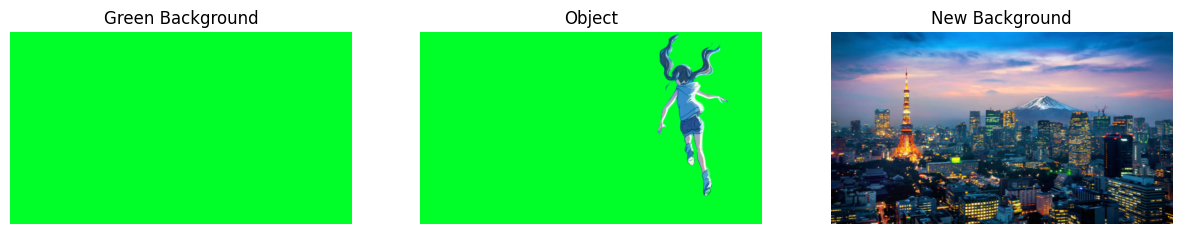

In [10]:
bg1_image = cv2.imread("data/GreenBackground.png", 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread("data/Object.png", 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread("data/NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

#
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(bg1_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Green Background")
ax[0].axis("off")

#
ax[1].imshow(cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Object")
ax[1].axis("off")

#
ax[2].imshow(cv2.cvtColor(bg2_image, cv2.COLOR_BGR2RGB))
ax[2].set_title("New Background")
ax[2].axis("off")
plt.show()

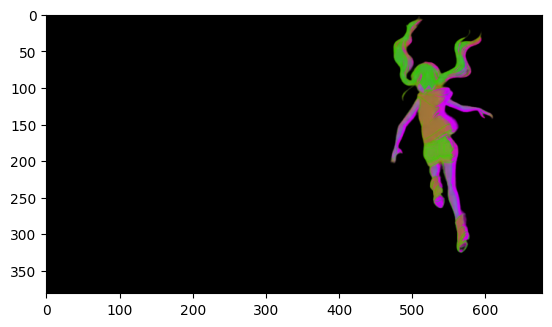

In [11]:
def compute_difference(bg_img, input_img):
    """
    Compute the difference between two images
    difference = |bg_img - input_img|

    :param bg_img: input background image
    :param input_img: input image
    :return: difference between the two images
    """

    difference_single_channel = cv2.absdiff(bg_img, input_img)
    return difference_single_channel


difference_single_channel = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single_channel)

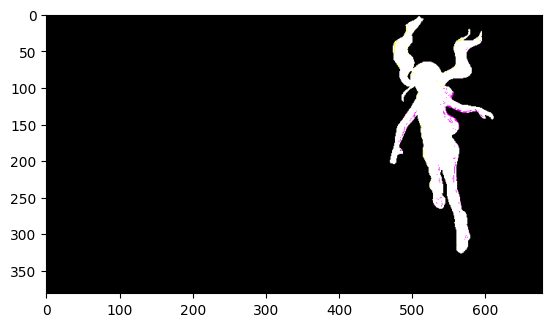

In [12]:
def compute_binary_mask(difference_single_channel):
    """
    Compute the binary mask of the difference image
    binary_mask = difference > 0

    :param difference_single_channel: input difference image
    :return: binary mask of the difference image
    """
    _, binary_mask = cv2.threshold(difference_single_channel, 0, 255, cv2.THRESH_BINARY)
    return binary_mask


binary_mask = compute_binary_mask(difference_single_channel)
plt.imshow(binary_mask)

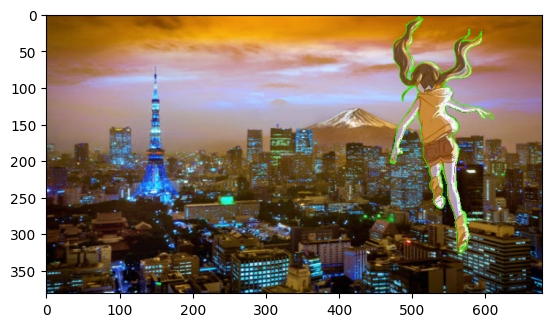

In [13]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output


output_image = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(output_image)

# Câu hỏi trắc nghiệm

In [14]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(round(result, 2))

23.28


In [ ]:
# 1 -> d)

In [15]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


In [ ]:
# 2 -> b)

In [16]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print("result \n", x.dot(k))

result 
 [ 5 11]


In [17]:
# 3 -> a)

In [18]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print("result \n", x @ k)

result 
 [ 3 -5]


In [19]:
# 4 -> b)

In [20]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [21]:
# 5 -> a)

In [22]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [23]:
# 6 -> c)

In [24]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1 @ m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [25]:
# 7 -> a)

In [26]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[5. 5. 5. 5.]


In [27]:
# 8 -> d)

In [28]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F")[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[29 29 29 29]


In [29]:
# 9 -> b)

In [31]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


In [32]:
# 10 -> a)

In [33]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [34]:
# 11 -> a)

In [35]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577


In [ ]:
# 12 -> c)